In [38]:
#Import all Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline


<h3> Question1</h3><br><font=3>Display the data types of each column using the attribute dtype, then take a screenshot and submit it, include your cod0e in the image.</font> 

In [46]:
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

In [47]:
 print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object



<h3>Question 2</h3><br>
<font=3>Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Take a screenshot and submit it, make sure the inplace parameter is set to True</font>

In [48]:
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [49]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [50]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [51]:
df.drop(['id','Unnamed: 0'],axis=1,inplace=True)


<h3>Question 3</h3>
<font=3>Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe.</font>

In [52]:
sr = df['floors'].value_counts().to_frame()
print(sr)

     floors
1.0   10680
2.0    8241
1.5    1910
3.0     613
2.5     161
3.5       8



<h3>Question 4</h3>
<br>
<font=3>Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers </font>

C:\Users\musta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='waterfront', ylabel='price'>

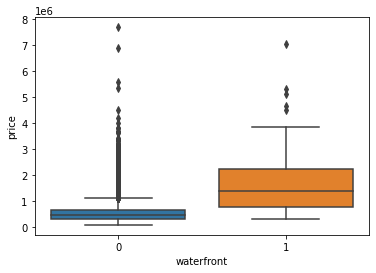

In [53]:
sns.boxplot(df['waterfront'],df['price'])


<h3>Question 5</h3>
<br>
<font=3>Use the function  regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.</font>

(0.0, 8081250.0)

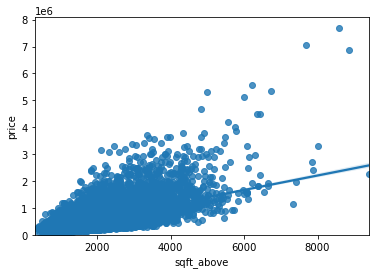

In [54]:
sns.regplot(x='sqft_above', y='price',data=df)
plt.ylim(0,)



<h3>Question 6</h3>
<br>
<font=3>Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2. Take a screenshot of your code and the value of the R^2.</font>

In [57]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm
lm.fit(X,Y)
lm.score(X, Y)

0.4928532179037931


<h3>Question 7</h3>
<br>
<font=3>Fit a linear regression model to predict the 'price' using the list of features:</font>

In [58]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [59]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     
X = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
Y = df['price']
lm2 = LinearRegression()
lm2
lm2.fit(X,Y)
lm2.score(X, Y)

0.6576951666037502

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [66]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features ]
Y = df['price']
 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 3242
number of training samples: 18371



<h3>Question 8</h3>
<br>
<font=3>Use the list to create a pipeline object, predict the 'price', fit the object using the features in the list  features , then fit the model and calculate the R^2</font>

In [68]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]


In [69]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [70]:
pipe.fit(X,Y)
pipe.score(X,Y)

0.7513406905914715


<h3>Question 9</h3>
<br>
<font=3>Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the R^2 using the test data. </font>

In [71]:
from sklearn.linear_model import Ridge

RigeModel = Ridge(alpha=0.1) 
RigeModel.fit(x_train, y_train)
RigeModel.score(x_test, y_test)

0.6478759163939112


<h3>Question 10</h3>
<br>
<font=3>Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, setting the regularisation parameter to 0.1. Calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.</font>

In [72]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[features])
x_test_pr=pr.fit_transform(x_test[features])

RigeModel = Ridge(alpha=0.1) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.7002744262868892